In [1]:
import pandas as pd
import numpy as np
from numpy.random import randint
from datetime import datetime
import gc
import os
import re
from collections import Counter
import warnings
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
matplotlib.use("TkAgg")
%matplotlib inline

In [2]:
target_lang_list = ["koreana", "japanese", "tchinese", "schinese", "thai", "turkish",
                    "english", "french", "german", "italian", "czech", "norwegian", "swedish", "polish",
                    "portuguese", "spanish", "russian"]

# 각 언어별 처리에 필요한 값들을 데이터프레임 형식으로 작성
lang_data_dict = {
    # 언어 코드
    "code" : {
        "schinese": "zh-cn",
        "english": "en",
        "turkish": "tr",
        "spanish": "es",
        "russian": "ru",
        "koreana": "ko",
        "latam": "la",
        "brazilian": "pt",
        "portuguese": "pt",
        "vietnamese": "vi",
        "polish": "pl",
        "french": "fr",
        "german": "de",
        "hungarian": "hu",
        "ukrainian": "uk",
        "tchinese": "zh-tw",
        "bulgarian": "bg",
        "czech": "cs",
        "italian": "it",
        "thai": "th",
        "greek": "el",
        "dutch": "nl",
        "finnish": "fi",
        "romanian": "ro",
        "japanese": "ja",
        "swedish": "sv",
        "danish": "da",
        "norwegian": "no"
    },
    # 언어 별 폰트
    "font_path" : {
        "schinese": "./font/NotoSansSC-Bold.otf",
        "english": "./font/NotoSans-Bold.ttf",
        "turkish": "./font/NotoSans-Bold.ttf",
        "spanish": "./font/NotoSans-Bold.ttf",
        "russian": "./font/NotoSans-Bold.ttf",
        "koreana": "./font/NotoSansKR-Bold.otf",
        "latam": "./font/NotoSans-Bold.ttf",
        "brazilian": "./font/NotoSans-Bold.ttf",
        "portuguese": "./font/NotoSans-Bold.ttf",
        "vietnamese": "./font/NotoSans-Bold.ttf",
        "polish": "./font/NotoSans-Bold.ttf",
        "french": "./font/NotoSans-Bold.ttf",
        "german": "./font/NotoSans-Bold.ttf",
        "hungarian": "./font/NotoSans-Bold.ttf",
        "ukrainian": "./font/NotoSans-Bold.ttf",
        "tchinese": "./font/NotoSansTC-Bold.otf",
        "bulgarian": "./font/NotoSans-Bold.ttf",
        "czech": "./font/NotoSans-Bold.ttf",
        "italian": "font/NotoSans-Bold.ttf",
        "thai": "./font/Itim-Regular.ttf",
        "greek": "./font/NotoSans-Bold.ttf",
        "dutch": "./font/NotoSans-Bold.ttf",
        "finnish": "./font/NotoSans-Bold.ttf",
        "romanian": "./font/NotoSans-Bold.ttf",
        "japanese": "./font/NotoSansJP-Bold.otf",
        "swedish": "./font/NotoSans-Bold.ttf",
        "danish": "./font/NotoSans-Bold.ttf",
        "norwegian": "./font/NotoSans-Bold.ttf"
    },
    # 유니코드를 활용한 정규식 패턴
    "unicode_pattern": {
        "schinese": r"",
        "english": r"[^A-Za-z' ]+", # 띄어쓰기 중요, 다른 언어도 공백 유지 추가
        "turkish": r"",
        "spanish": r"",
        "russian": r"[^\u0401\u0410-\u041F\u0430-\u043F\u0451]+",
        "koreana": r"[^\uAC00-\uD7AF\u1100-\u11FF]+",
        "latam": r"",
        "brazilian": r"",
        "portuguese": r"[^\u0041-\u005A\u0061-\u007A\u00C0-\u00C3\\u00C7-\u00C9\u00CC\u00CD\u00D2-\u00D5\u00D9\u00DA\u00E0-\u00E3\u00E7-\u00EA\u00EC\u00ED\u00F2-\u00F5\u00F9\u00FA]+",
        "vietnamese": r"",
        "polish": r"",
        "french": r"[^\u0041-\u005A\u0061-\u007A\u0153\u00E0\u00E2\u00E6-\u00EB\u00EE\u00EF\u00FB\u00FF]+",
        "german": r"[^A-Za-z\u00C4\u00D6\u00DC\u00DF\u00E4\u00F6\u00FC]+",
        "hungarian": r"",
        "ukrainian": r"",
        "tchinese": r"",
        "bulgarian": r"",
        "czech": r"",
        "italian": r"[^\u0041-\u005A\u0061-\u007A\u00C0\u00C1\u00C8\u00C0\u00CC\u00CD\u00D2\u00D3\u00D9\u00DA\u00E0\u00E1\u00E8\u00E9\u00EC\u00ED\u00F2\u00F3\u00F9\u00FA]+",
        "thai": r"[^\u0E00-\u0E7F]+",
        "greek": r"",
        "dutch": r"",
        "finnish": r"",
        "romanian": r"",
        "japanese": r"",
        "swedish": r"",
        "danish": r"",
        "norwegian": r""
    }
}

# 원하는 값을 닷 연산자로 직관적으로 접근하기 위한 데이터프레임 생성
lang_data = pd.DataFrame([], columns=lang_data_dict.keys(), index=target_lang_list)

for lang in lang_data.index:
    lang_data.loc[lang] = [lang_data_dict[column][lang] for column in lang_data.columns]

display(lang_data)

,code,font_path,unicode_pattern
koreana,ko,./font/NotoSansKR-Bold.otf,[^\uAC00-\uD7AF\u1100-\u11FF]+
japanese,ja,./font/NotoSansJP-Bold.otf,
tchinese,zh-tw,./font/NotoSansTC-Bold.otf,
schinese,zh-cn,./font/NotoSansSC-Bold.otf,
thai,th,./font/Itim-Regular.ttf,[^\u0E00-\u0E7F]+
turkish,tr,./font/NotoSans-Bold.ttf,
english,en,./font/NotoSans-Bold.ttf,[^A-Za-z' ]+
french,fr,./font/NotoSans-Bold.ttf,[^\u0041-\u005A\u0061-\u007A\u0153\u00E0\u00E2...
german,de,./font/NotoSans-Bold.ttf,[^A-Za-z\u00C4\u00D6\u00DC\u00DF\u00E4\u00F6\u...
italian,it,font/NotoSans-Bold.ttf,[^\u0041-\u005A\u0061-\u007A\u00C0\u00C1\u00C8...


In [3]:
import nltk
from nltk.tokenize import TreebankWordTokenizer # 유니코드 대체 대신 토큰화->품사태깅 방식 차용
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
from nltk.tag import pos_tag

tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
lang = "russian"
review_data = pd.read_csv(f"dataset/reviews/russian_chunk1.csv", encoding="utf-8-sig")

display(review_data)

,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created,quadrant
0,292030,The Witcher 3: Wild Hunt,85182372,russian,"Шикарная игра с отличным сюжетом, неплохой гра...",True,1611376281,1
1,292030,The Witcher 3: Wild Hunt,85181146,russian,Замечательная карточная игра в антураже фэнтез...,True,1611374238,1
2,292030,The Witcher 3: Wild Hunt,85168239,russian,Безусловно одна из лучших и интереснейших игр ...,True,1611354213,1
3,292030,The Witcher 3: Wild Hunt,85167888,russian,"Очень длинная бродилка)) Для любителей, вот ге...",True,1611353696,1
4,292030,The Witcher 3: Wild Hunt,85167706,russian,top,True,1611353447,1
...,...,...,...,...,...,...,...,...
999995,1289310,Helltaker,70776677,russian,"Игра весёлая, мне понравилось",True,1592140832,1
999996,1289310,Helltaker,70775526,russian,NaN,True,1592139236,1
999997,1289310,Helltaker,70774944,russian,"Эта игра пропагандирует сатанизм, педофилию, Л...",False,1592138423,4
999998,1289310,Helltaker,70774257,russian,А разве нужны слова,True,1592137408,1


In [5]:
print(f"[{lang}] - before")
display(review_data)

# 리뷰 데이터 자연어처리
def nlp_review(review):    
    # 텍스트 형태의 데이터가 float으로 불러와지는 경우를 방지하기 위해 명시적으로 형변환
    review = str(review)
    
    # 문자 추출
    pattern = lang_data.unicode_pattern[lang]
    #review = re.sub(pattern, "", review)
    trash = re.compile(r"[\u0021-\u0039]")
    review = trash.sub("", review)

    stop_ru = set(stopwords.words("russian"))
    stop_eng = set(stopwords.words("english"))
    
    # 소문자 전환
    review = review.lower()

    # 문장 토큰화
    token_list = tokenizer.tokenize(review)
    tokens = []
    for token in token_list:
        token = "".join(re.findall(pattern, token))
        #print(token)
        tokens.append(token)
    #병합 부분
    lemma_list = []

    for x in tokens:
        if x not in stop_ru and x not in stop_eng:
            lemma_list.append(x)
        
    #result = [lm.lemmatize(w, pos="v") for w in result]

    
    
    #print(tagged_list)

    # 표제어 추출(lemmatization)
    lemma_list = [lemmatizer.lemmatize(x) for x in token_list]
    tagged_list = pos_tag(lemma_list)
    
    # 어간 추출(stemming)
    # nltk의 어간 추출은 단어 원형이 깨지는 경우가 있고, 많은 리뷰에서 일일히 스태머끼리 비교를 할 수 없기에 제외
    
    # 품사 태깅, https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
    pos_list = nltk.pos_tag(lemma_list)
    
    """ 어느 품사까지 포함시킬 것인지?(["VB", "VBD", "VBG", "VBN" ....]) 품사를 지원하지 않는 언어는 무엇이 있는지? """
    # 명사 추출, 표제어 추출 과정을 통해 복수형은 변환되었을 것으로 추정하지만 네개의 품사를 일단 사용
    nouns_list = [x[0] for x in pos_list if x[1] in ["NN", "NNS", "NNP", "NNPS"]]
     
    if nouns_list:
        return " ".join(nouns_list)
    else:
        # 필터링 결과가 공백인 경우 명시적으로 결측치 처리
        return np.nan


review_data["review"] = review_data[["review"]].apply(
    lambda x: nlp_review(x["review"]), axis=1
)

# 필터링 결과가 결측치인 행 제거
review_data = review_data.dropna(axis=0, how="any")

print(f"[{lang}] - after")
display(review_data)

[russian] - before


,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created,quadrant
0,292030,The Witcher 3: Wild Hunt,85182372,russian,"Шикарная игра с отличным сюжетом, неплохой гра...",True,1611376281,1
1,292030,The Witcher 3: Wild Hunt,85181146,russian,Замечательная карточная игра в антураже фэнтез...,True,1611374238,1
2,292030,The Witcher 3: Wild Hunt,85168239,russian,Безусловно одна из лучших и интереснейших игр ...,True,1611354213,1
3,292030,The Witcher 3: Wild Hunt,85167888,russian,"Очень длинная бродилка)) Для любителей, вот ге...",True,1611353696,1
4,292030,The Witcher 3: Wild Hunt,85167706,russian,top,True,1611353447,1
...,...,...,...,...,...,...,...,...
999995,1289310,Helltaker,70776677,russian,"Игра весёлая, мне понравилось",True,1592140832,1
999996,1289310,Helltaker,70775526,russian,NaN,True,1592139236,1
999997,1289310,Helltaker,70774944,russian,"Эта игра пропагандирует сатанизм, педофилию, Л...",False,1592138423,4
999998,1289310,Helltaker,70774257,russian,А разве нужны слова,True,1592137408,1


[russian] - after


,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created,quadrant
0,292030,The Witcher 3: Wild Hunt,85182372,russian,игра с отличным сюжетом неплохой графикой и бо...,True,1611376281,1
1,292030,The Witcher 3: Wild Hunt,85181146,russian,карточная игра в антураже фэнтезирпг,True,1611374238,1
2,292030,The Witcher 3: Wild Hunt,85168239,russian,одна из лучших и интереснейших игр если дать э...,True,1611354213,1
3,292030,The Witcher 3: Wild Hunt,85167888,russian,длинная бродилка для любителей вот геймплей пе...,True,1611353696,1
4,292030,The Witcher 3: Wild Hunt,85167706,russian,top,True,1611353447,1
...,...,...,...,...,...,...,...,...
999995,1289310,Helltaker,70776677,russian,весёлая мне понравилось,True,1592140832,1
999996,1289310,Helltaker,70775526,russian,nan,True,1592139236,1
999997,1289310,Helltaker,70774944,russian,игра пропагандирует сатанизм педофилию лгбт те...,False,1592138423,4
999998,1289310,Helltaker,70774257,russian,разве нужны слова,True,1592137408,1


In [6]:
ru_text = " ".join(review_data["review"].tolist())
ru_text_counter = Counter(ru_text.split(" "))

display(ru_text_counter.most_common(20))

[('и', 795810),
 ('energydess', 688500),
 ('expressocup', 642135),
 ('в', 599515),
 ('не', 484225),
 ('игра', 338343),
 ('на', 333245),
 ('с', 269303),
 ('что', 256890),
 ('но', 210313),
 ('я', 198331),
 ('это', 195048),
 ('а', 157053),
 ('из', 147535),
 ('как', 138944),
 ('[', 124387),
 ('за', 122876),
 (']', 114955),
 ('так', 112575),
 ('по', 112260)]

In [1]:
#game ==игра
stopword_list = stopwords.words("russian")+[":", "?", "[","]","и", "в", "", "loh","игра","на","что","но","я", "это", "а", "из",  "как", "за","так","по","игры","игру"]

for stopword in stopword_list:
    if stopword in ru_text_counter.keys():
        del ru_text_counter[stopword]
        
display(ru_text_counter.most_common(20))

NameError: name 'stopwords' is not defined

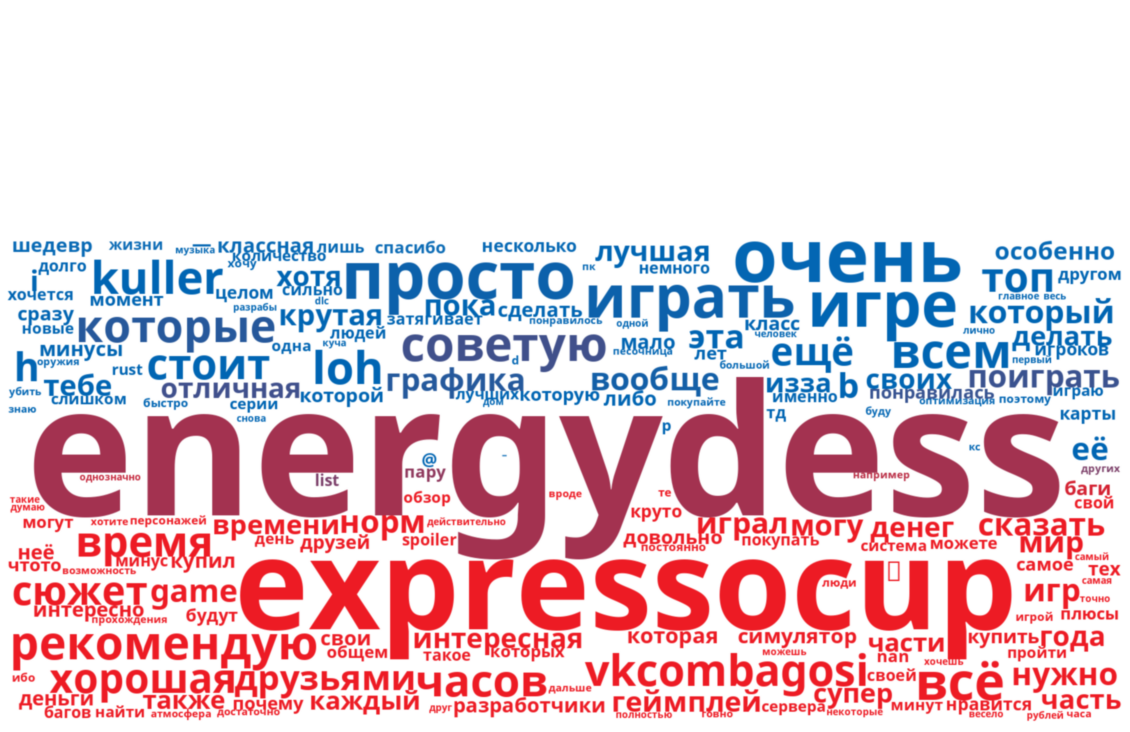

In [13]:
mask = np.array(Image.open(f"ref/russia.jpg"))

wc = WordCloud(font_path=lang_data.font_path.russian, prefer_horizontal=1.0,
               background_color="rgb(255,255,255)", mask=mask, color_func=ImageColorGenerator(mask),
               min_font_size = 10,
               max_words=200, width=2560, height=1707).generate_from_frequencies(ru_text_counter) 

plt.figure(figsize=(20,20))

plt.imshow(wc, interpolation="bicubic")
plt.axis("off")
plt.show()